In [1]:
from tensorflow.keras.models import Sequential
from keras import applications
img_height,img_width = 100,100 
resnet_weights_path = '/Users/rogierlandman/from_Samsung/Python/2019_01_17-01_R4good/kerasenv/Python_Scripts/6209_9900_bundle_archive/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model = applications.resnet50.ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape= (img_height,img_width,3))
#my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [2]:
import cv2
import os
import numpy as np
from glob import iglob

rootdir = '/Users/rogierlandman/from_Samsung/spec_images_syllables/*'
# This will return absolute paths
file_list = [f for f in iglob(rootdir, recursive=False) if os.path.isfile(f)]
#print(file_list)
resnet_feature_list = []
for file in file_list:
    print(file)
    im = cv2.imread(file)
    im = cv2.resize(im,(100,100))
    im = np.expand_dims(im, axis=0)
    #img = preprocess_input(np.expand_dims(im.copy(), axis=0))
    resnet_feature = my_new_model.predict(im)
    resnet_feature_np = np.array(resnet_feature)
    resnet_feature_list.append(resnet_feature_np.flatten())

resnet_feature_list = np.array(resnet_feature_list)
print('done')

/Users/rogierlandman/from_Samsung/spec_images_syllables/im0103.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0117.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0301.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0315.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0329.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0275.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0261.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0249.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0077.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0063.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0088.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0089.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0062.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0076.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0248

/Users/rogierlandman/from_Samsung/spec_images_syllables/im0017.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0016.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0002.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0228.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0214.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0200.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0348.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0360.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0406.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0412.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0374.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0189.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0162.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0176.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0172

/Users/rogierlandman/from_Samsung/spec_images_syllables/im0190.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0184.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0379.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0351.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0345.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0392.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0386.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0219.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0225.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0231.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0027.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0033.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0032.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0026.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0230

/Users/rogierlandman/from_Samsung/spec_images_syllables/im0050.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0087.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0093.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0092.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0086.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0051.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0045.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0079.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0290.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0284.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0253.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0247.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0327.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0333.png
/Users/rogierlandman/from_Samsung/spec_images_syllables/im0125

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(resnet_feature_list)
print('done')

In [3]:
import umap
import matplotlib.pyplot as plt

n_neighbors=50
min_dist=0.0
n_components=12
metric='euclidean'
metric='canberra'

fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        verbose=True
    )
embedding = fit.fit_transform(resnet_feature_list);

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='canberra',
     metric_kwds=None, min_dist=0.0, n_components=12, n_epochs=None,
     n_neighbors=50, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Aug 19 00:15:41 2020 Finding Nearest Neighbors
Wed Aug 19 00:15:43 2020 Finished Nearest Neighbor Search
Wed Aug 19 00:15:45 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed

In [4]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=8, random_state=0).fit(embedding)
#print('done')


kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(embedding)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]



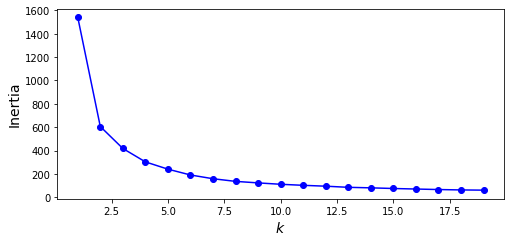

In [5]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.axis([1, 8.5, 0, 1300])
plt.show()

In [12]:
n_cl=5
kmeans = KMeans(n_clusters=n_cl, random_state=0).fit(embedding)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='canberra',
     metric_kwds=None, min_dist=0.0, n_components=2, n_epochs=None,
     n_neighbors=50, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Aug 19 00:18:48 2020 Finding Nearest Neighbors
Wed Aug 19 00:18:48 2020 Finished Nearest Neighbor Search
Wed Aug 19 00:18:48 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed 

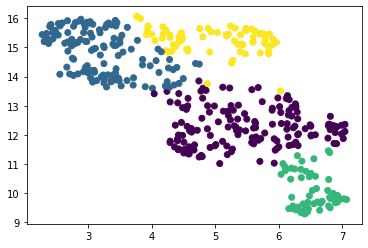

In [13]:
import umap
import matplotlib.pyplot as plt

n_neighbors=50
min_dist=0.0
n_components=2
metric='euclidean'
metric='canberra'

fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        verbose=True
    )
embedding = fit.fit_transform(resnet_feature_list);

plt.scatter(embedding[:,0], embedding[:,1],c=kmeans.labels_)
plt.show()

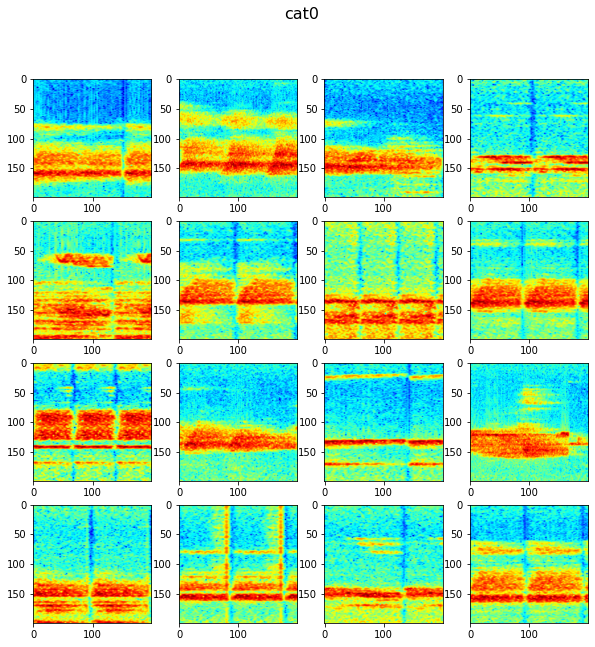

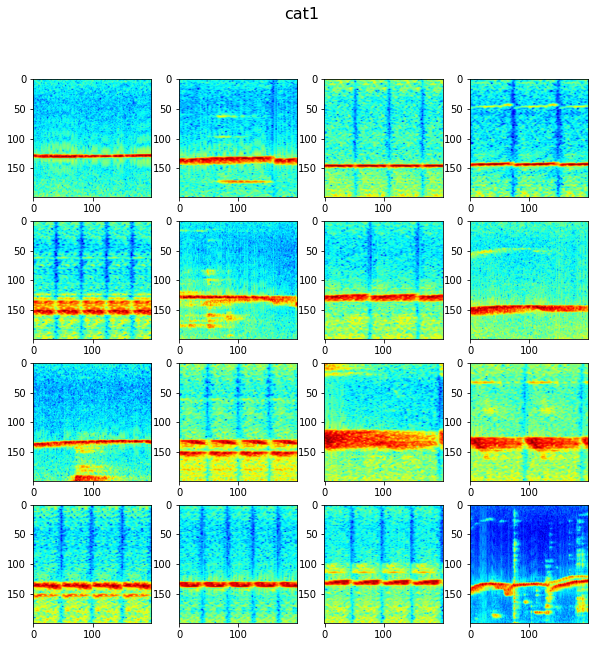

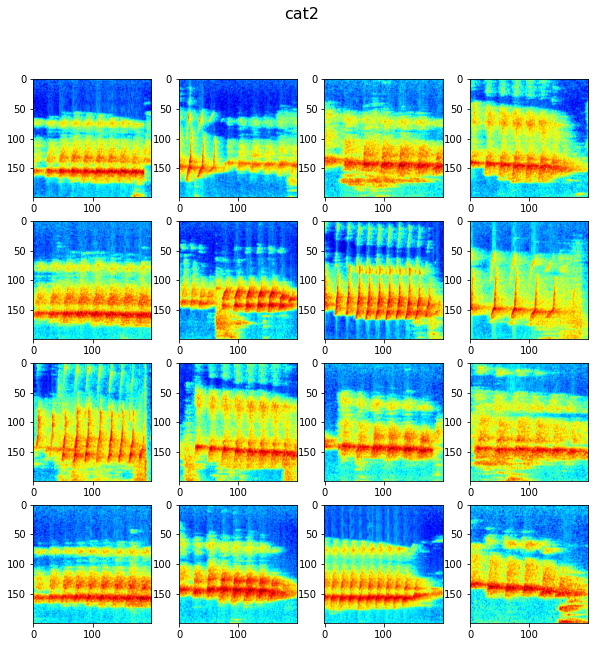

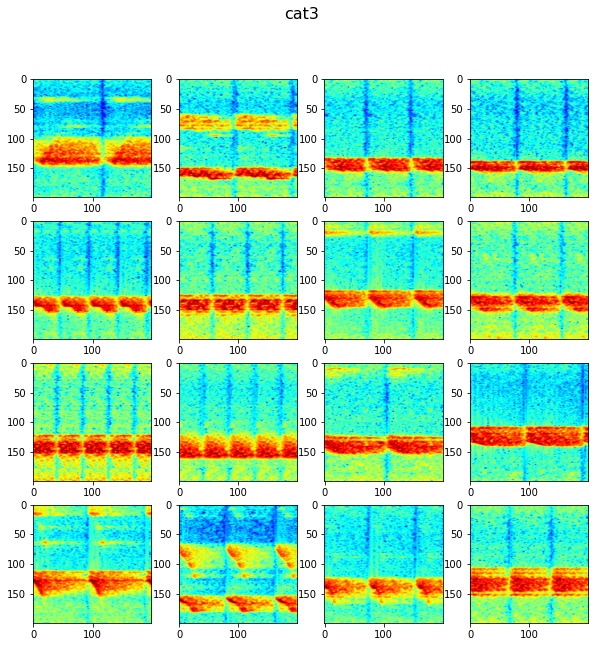

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for z in range(n_cl):
    apples = []
    for index, f in enumerate(kmeans.labels_):
        if (f == z):
            apples.append(index)
                
    fig=plt.figure(figsize=(10, 10))
    fig.suptitle('cat'+ str(z), fontsize=16)
    columns = 4
    rows = 4
    for i in range(columns*rows):
        img=mpimg.imread(file_list[apples[i]])
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
    plt.show()




                
